# cryoCARE odd-and_even registered
N2N (Noise2Noise) denoising del volumen empiar11415. Utiliza 4 volúmenes:

1. $V_1$, con los planos Z pares ("even").
2. $V_2$, con los planos Z impares ("odd").
3. $V_3$, con los slices Z impares proyectados sobre los slices pares.
4. $V_4$, con los slices Z pares proyectados sobre los slices impares.

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/empiar11415`.

## Creamos $V_2$
El volumen "odd" proyectado. Para ello usamos los volúmenes even y odd ya generados previsamente en el experimento cryoCARE__even_odd.ipynb.

In [1]:
%run project_odd_even_and_viceversa.ipynb

ModuleNotFoundError: No module named 'nbformat'

## Configuramos cryoCARE

In [2]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/train_data_config__odd_even_registered.json
{
    "even": ["even.mrc", "odd_registered.mrc"],
    "odd": ["odd.mrc", "even_registered.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 800,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./odd_even_registered_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/train_data_config__odd_even_registered.json


In [3]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/train_data_config__odd_even_registered.json
{
    "even": ["even.mrc", "even_registered.mrc"],
    "odd": ["odd_registered.mrc", "odd.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 800,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./odd_even_registered_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/train_data_config__odd_even_registered.json


In [16]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/train_data_config__odd_even_registered.json
{
    "even": ["even.mrc", "odd_registered.mrc"],
    "odd": ["even_registered.mrc", "odd.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 800,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./odd_even_registered_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/train_data_config__odd_even_registered.json


In [29]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/train_data_config__odd_even_registered.json
{
    "even": ["even_registered.mrc", "even.mrc"],
    "odd": ["odd.mrc", "odd_registered.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 800,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./odd_even_registered_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/train_data_config__odd_even_registered.json


In [30]:
%%bash
cd /nas/vruiz/cryoCARE/empiar11415
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__odd_even_registered.json

2025-10-09 13:17:25.283171: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(33, 2048, 2660), sample_shape=[16, 16, 16]
even.data.shape=(33, 2048, 2660), sample_shape=[16, 16, 16]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 1400.33it/s]


## Entrenamos

In [31]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/train_config__odd_even_registered.json
{
  "train_data": "./odd_even_registered_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [1]
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/train_config__odd_even_registered.json


In [32]:
%%bash
cd /nas/vruiz/cryoCARE/empiar11415
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__odd_even_registered.json

2025-10-09 13:17:30.856520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-09 13:17:32.424772: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-09 13:17:32.425566: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-09 13:17:32.448361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-09 13:17:32.450401: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-09 13:17:32.450497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 16
2 16
3 16
4 1
Epoch 1/50


2025-10-09 13:17:36.240934: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-09 13:17:37.515973: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-09 13:17:37.587116: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-09 13:17:38.382497: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-09 13:17:38.667614: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-09 13:18:05.033353: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding 

200/200 [==============================] - 45s 84ms/step - loss: 0.5200 - mse: 0.5200 - mae: 0.5558 - val_loss: 0.4687 - val_mse: 0.4687 - val_mae: 0.5153
Epoch 2/50
200/200 [==============================] - 3s 15ms/step - loss: 0.3997 - mse: 0.3997 - mae: 0.4912 - val_loss: 0.4518 - val_mse: 0.4518 - val_mae: 0.5085
Epoch 3/50
200/200 [==============================] - 3s 17ms/step - loss: 0.3805 - mse: 0.3805 - mae: 0.4818 - val_loss: 0.4416 - val_mse: 0.4416 - val_mae: 0.4996
Epoch 4/50
200/200 [==============================] - 3s 15ms/step - loss: 0.3814 - mse: 0.3814 - mae: 0.4806 - val_loss: 0.4430 - val_mse: 0.4430 - val_mae: 0.4994
Epoch 5/50
200/200 [==============================] - 3s 17ms/step - loss: 0.3791 - mse: 0.3791 - mae: 0.4795 - val_loss: 0.4416 - val_mse: 0.4416 - val_mae: 0.4990
Epoch 6/50
200/200 [==============================] - 3s 15ms/step - loss: 0.3785 - mse: 0.3785 - mae: 0.4783 - val_loss: 0.4358 - val_mse: 0.4358 - val_mae: 0.4955
Epoch 7/50
200/200 [

/home/jupyter-vruiz/envs/cryoCARE/lib/python3.8/site-packages/csbdeep/models/base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: /nas/vruiz/cryoCARE/empiar11415/model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))



Loading network weights from 'weights_best.h5'.


In [33]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/predict_config__odd_even_registered.json
{
    "path": "./model.tar.gz",
    "even": ["empiar11415.mrc"], 
    "odd": ["empiar11415.mrc"],
    "n_tiles": [1,2,2],
    "output": "odd_even_registered_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/predict_config__odd_even_registered.json


## Inferimos

In [34]:
%%bash
cd /nas/vruiz/cryoCARE/empiar11415
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__odd_even_registered.json || true

/nas/vruiz/cryoCARE/empiar11415


2025-10-09 13:20:59.922558: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-09 13:21:05.514023: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-09 13:21:05.514717: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-09 13:21:05.534815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-09 13:21:05.536249: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-09 13:21:05.536316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(56, 2048, 2664, 1)
Out of memory, retrying with n_tiles = (1, 2, 4, 1)


100%|██████████| 8/8 [00:23<00:00,  2.97s/it]    


['NEWSTACK: Images copied                                  3-Oct-25  17:07:14     '
 'mpleResistance=\r\n\x00Fieldsize=2.072e-005\r\nVerFieldsize=1.38133e-005\r\nAverage=0\r\nIn'
 'egrate=1\r\nFrameTime=51.1672\r\n\r\n[EScan]\r\nScan=\x00\x00\x00\x00\x00\x00\x00\x00OInterna\x00\x00\x00\x00\x00\x00\x00\x00Oe\r\nDwell=5'
 '-007\r\nPixelWidth=6.74479e-009\r\nPixelHeight=6.74479e-009\r\nHorFieldsize=2.072e-005'
 '\nVerFieldsize=1.38133e-005\r\nFrameTime=51.1672\r\nLineTime=0.024984\r\nMainslock=Off\r'
 'LineIntegration=16\r\nScanInterlacing=1\r\n\r\n[Stage]\r\nStageX=0.00371587\r\nStageY=0.00'
 '293\r\nStageZ=0.00403778\r\nStageR=-1.22169\r\nStageT=0.122173\r\nStageTb=0\r\nSpecTilt=\r\n'
 'orkingDistance=0.00403779\r\nActiveStage=Bulk\r\n\r\n[Image]\r\nDigitalContrast=1\r\nDigit'
 'cryoCARE                                                09-Oct-25  13:22:50     '
 '']


In [35]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [37]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar11415/empiar11415.mrc'
original_vol = read_MRC(mrc_file_path)

In [38]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar11415/odd_even_registered_denoised/empiar11415.mrc'
denoised_vol = read_MRC(mrc_file_path)

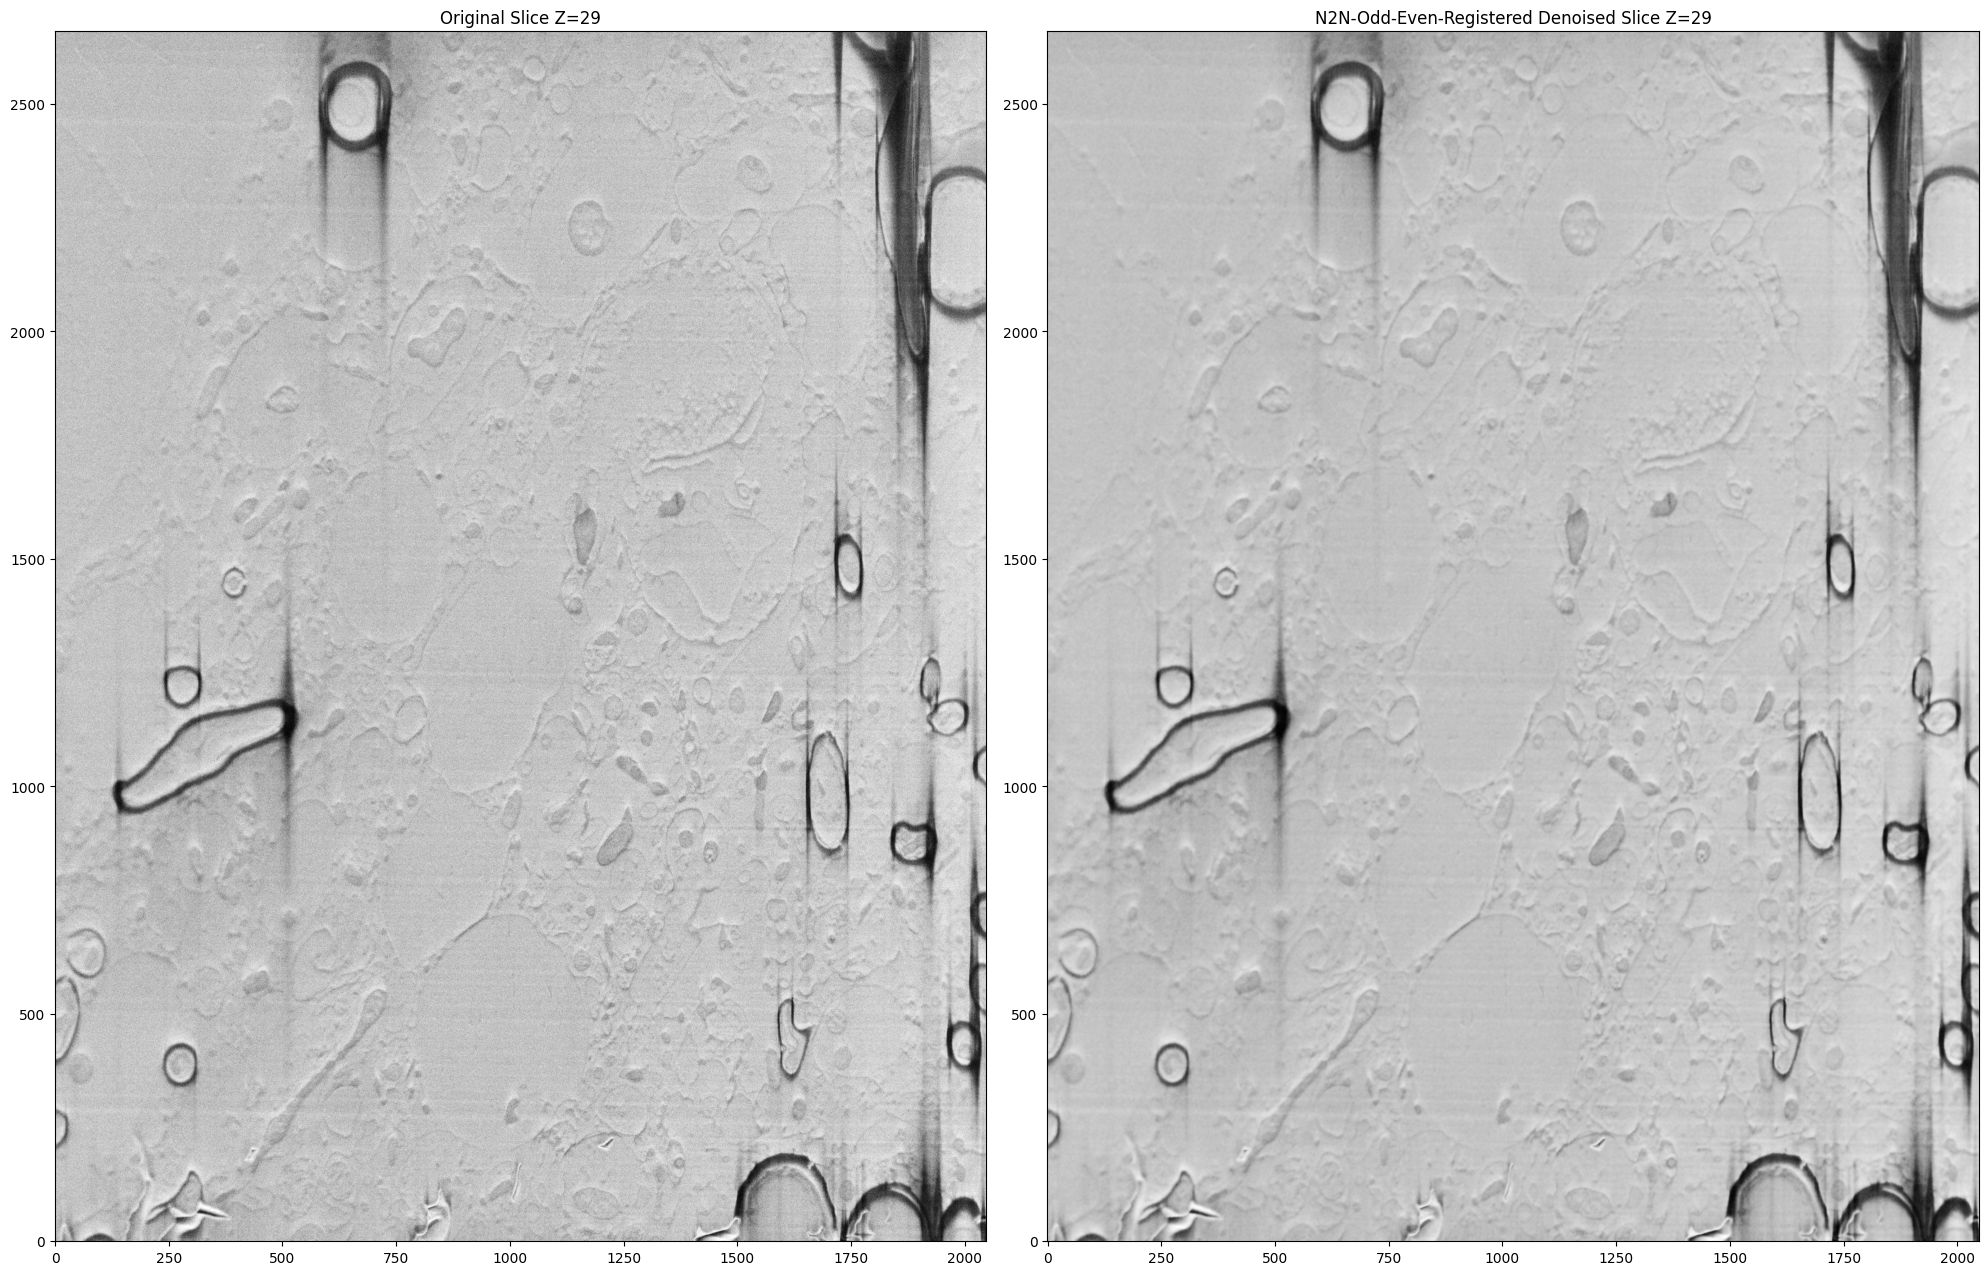

In [39]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

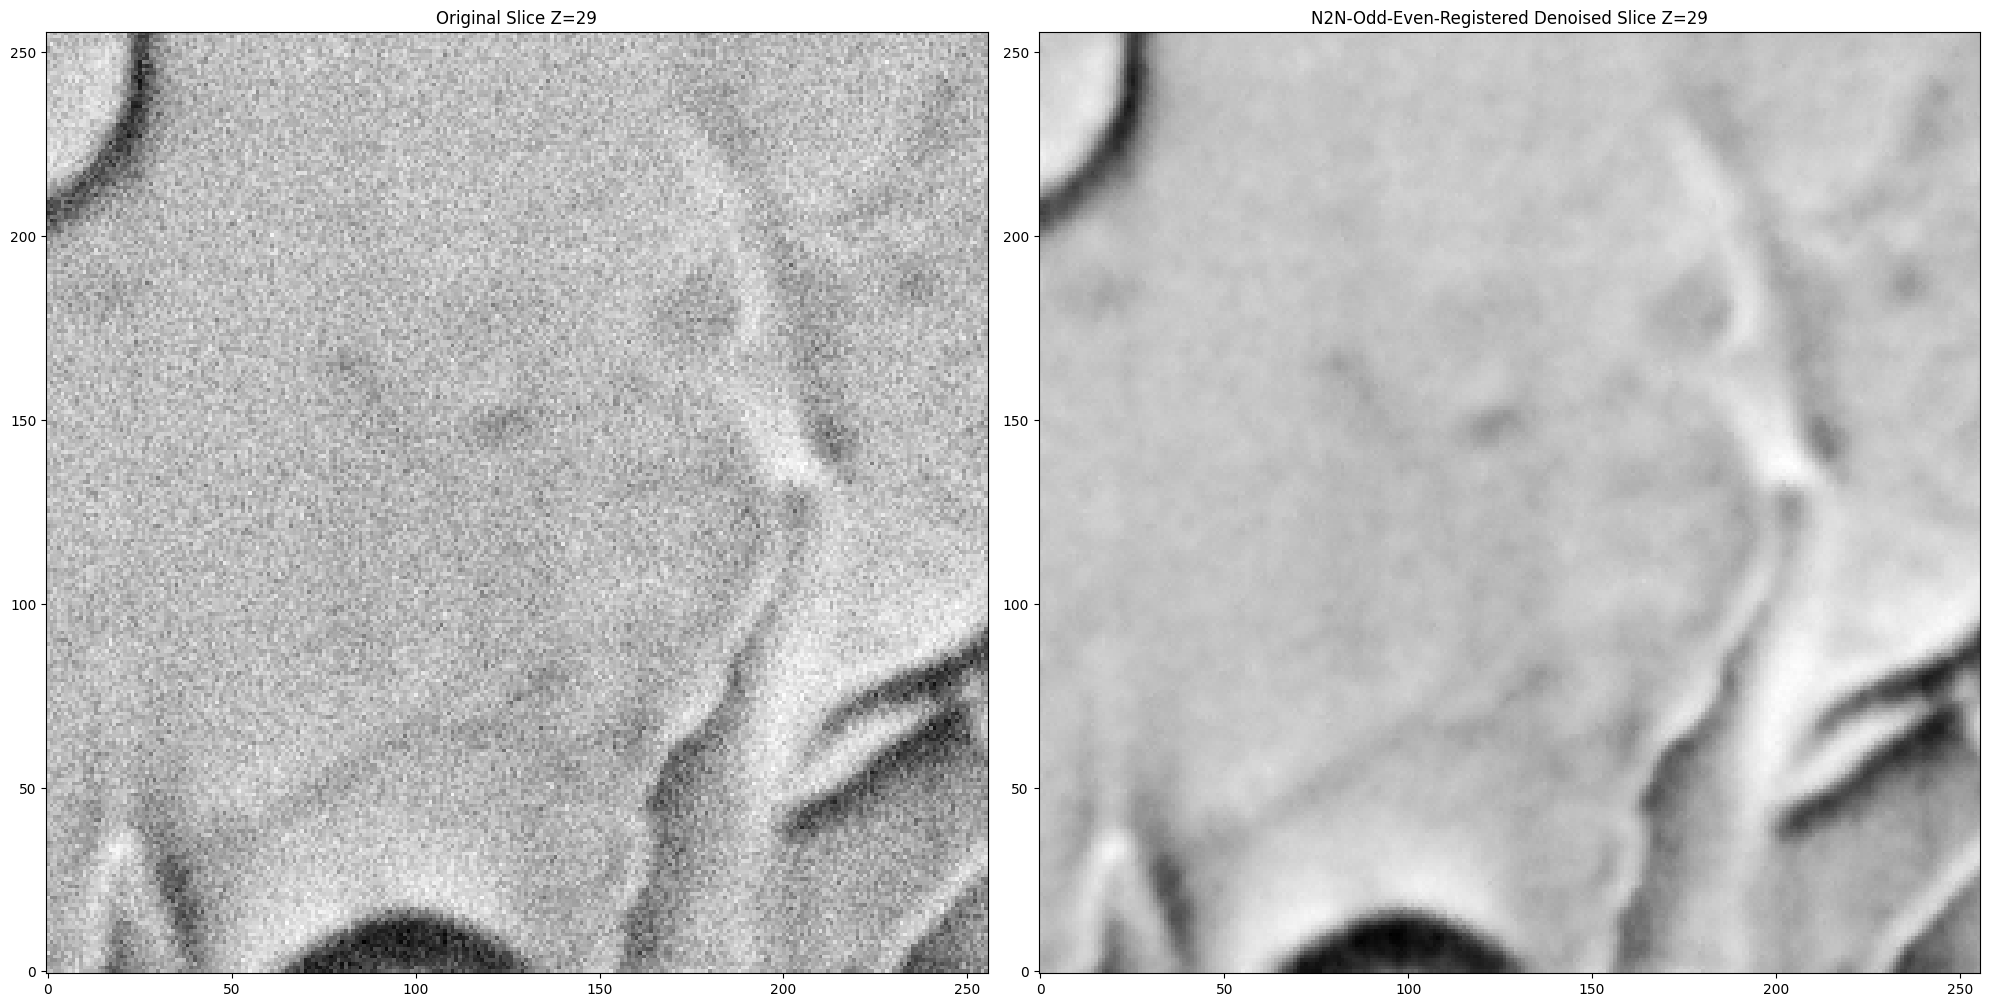

In [40]:
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, :256, :256].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, :256, :256].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

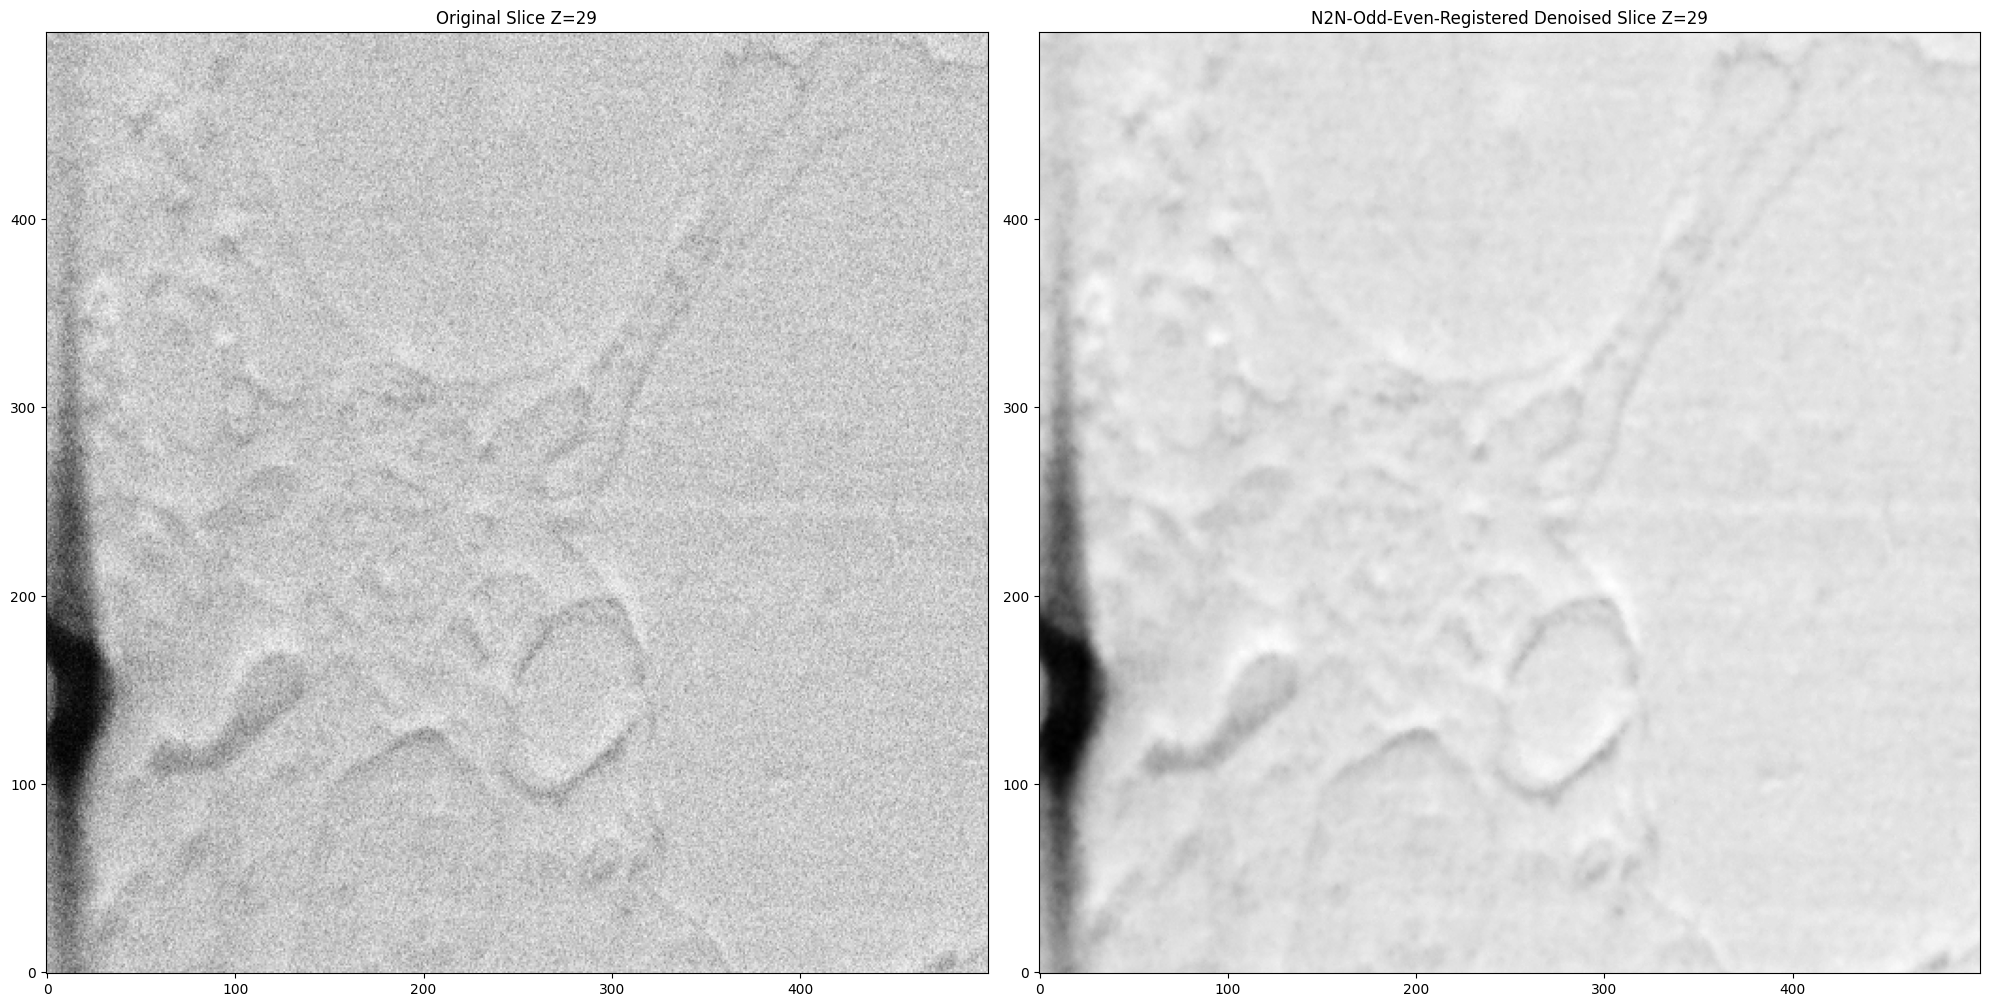

In [41]:
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()